# <center>Mayfly Project</center>
<center>MTH-337</center>
<center>by Rinat Ibragimov</center>

## Introduction

Human propensity towards visualization is unquestionable. From its dawn, mankind has sought to capture the world around us in a picture of our own design. Mostly, a means of communication - a way to share sights and experiences - but other times as an invaluable translation of some phenomena. And the modes of expression are as varied as the ideas which need conveying - Da Vinci's hand would do no good in say, showing the changing population of living beings.

Specifically, let's talk Mayflies. These dragonfly relatives spend at least a year living underwater as "nymphs", with the sole functions of eating, defecating, and growing. Until the final few days of their lives, where - as if a part of some grand spectacle - they emerge from their underwater shell with functioning wings, and take to the air. They conclude their remaining few days by mating and laying eggs. Effectively, at any one time, only one generation of the creatures are alive.

## The Model

To quantify this, assume that the size of the population $x_n$ solely depends on the population the previous year $x_{n-1}$. Then the abstract representation we get is:<br>
<center>$x_n=g(x_{n-1})\cdot x_{n-1}$</center>
Where $g()$ is the growth rate function of the population.

To get more specific, we must also consider that the population must have a ceiling - resources are limited and predators are many. Let's call this ceiling $M$.

This competition for resources also means that as the mayfly population approaches the proverbial ceiling, the growth rate of the population must decrease - the growth rate function is a **decreasing** one. For simplicity let's assume it is a linear one:<br>
<center>$g(x)=a(M-x)$</center>
for some $a>0$.

Our new equation is now:<br>
<center>$x_n=a(M-x_{n-1})\cdot x_{n-1}$</center>

This can be further simplified by letting:<br>
<center>$y_n=\frac{x_n}{M}$</center>
To give us:<br>
<center>$My_n=a(M-My_{n-1})\cdot My_{n-1}$</center>
Then simplifying leaves:
<center>$y_n=aM(1-y_{n-1})\cdot y_{n-1}$</center>

To complete the visuals, let $b=Ma$ and call it our *growth constant*:<br>
<h3><center>$y_n=b(1-y_{n-1})\cdot y_{n-1}$</center></h3>

In [1]:
%matplotlib notebook

# Organized all the facets of the model and graph into classes
import model, graph

## Interactive Picture

Below is an interactive plot of the mayfly model, with modiable growth constant and initial population. Click or drag the sliders underneath and the graph should update automatically.

<IPython.core.display.Javascript object>


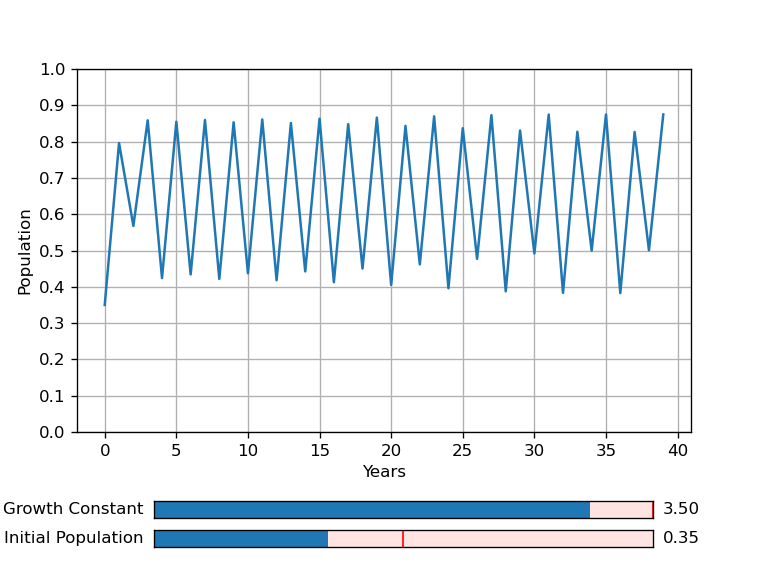

In [2]:
m = model.MayflyModel()
g = graph.InteractiveGraph(m)

## Observations

My approach involved keeping the initial population at the midpoint and changing the growth constant until an interval of typical behavior was identified. Then observing the effects on the model within said interval by changing the initial population.

### Extinction interval: $b<1.1$

Regardless of the initial population, the result always converges on 0.

<IPython.core.display.Javascript object>


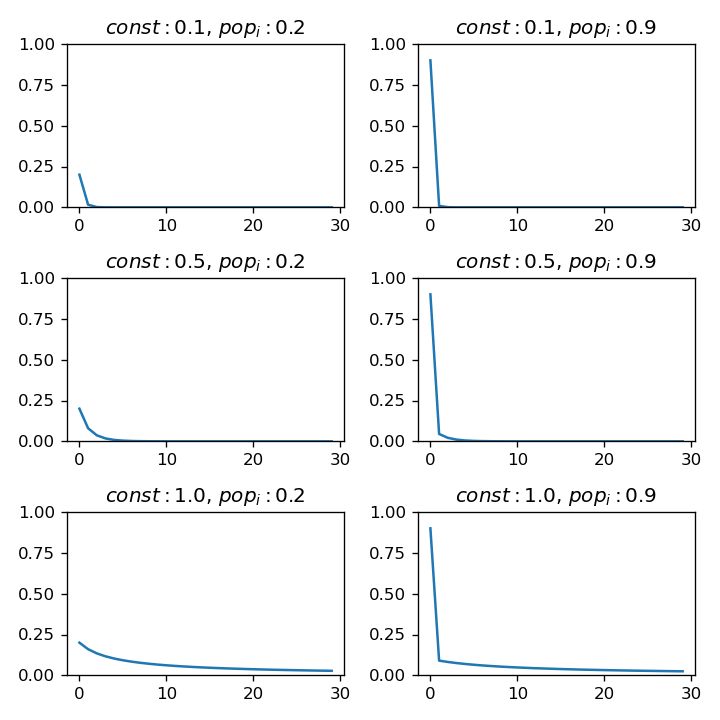

In [3]:
m2 = model.MayflyModel()

# Method further detailed in the graph.py module
# NOTE: supports up to 6 graphs, just found out as I was finishing up
# Parameters: (model, years, list of (growth const, initial pop) tuples)
graph.snapshot(
    m2, 30, 
    [(0.1, 0.2), (0.1, 0.9), 
     (0.5, 0.2), (0.5, 0.9), 
     (1.0, 0.2), (1.0, 0.9)])

### Easy-going interval: $1<b<2.3$

- #### Initial population: $0.05<pop_i\leq 0.55$<br>
Population stabilizes gracefully

<IPython.core.display.Javascript object>


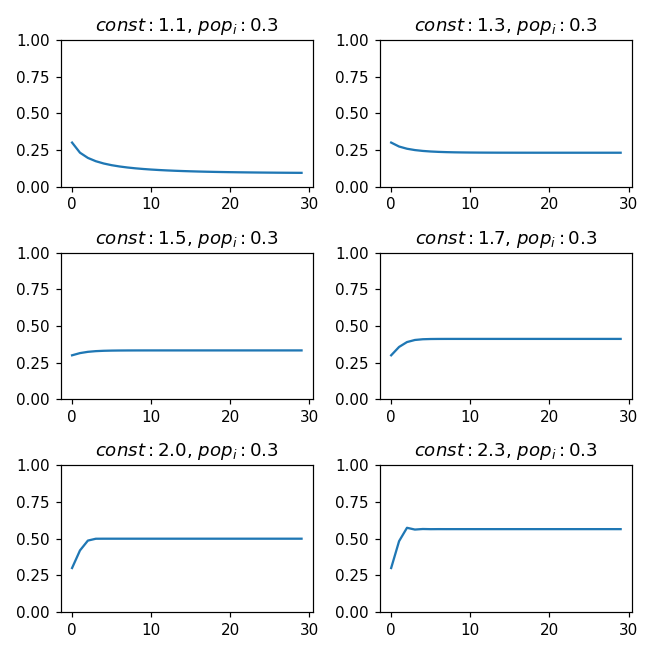

In [4]:
graph.snapshot(
    m2, 30, 
    [(1.1, 0.3), (1.3, 0.3), 
     (1.5, 0.3), (1.7, 0.3), 
     (2.0, 0.3), (2.3, 0.3)])

- #### Initial population: $0.6\leq pop_i<1$<br>
Stabilization after one rebound

<IPython.core.display.Javascript object>


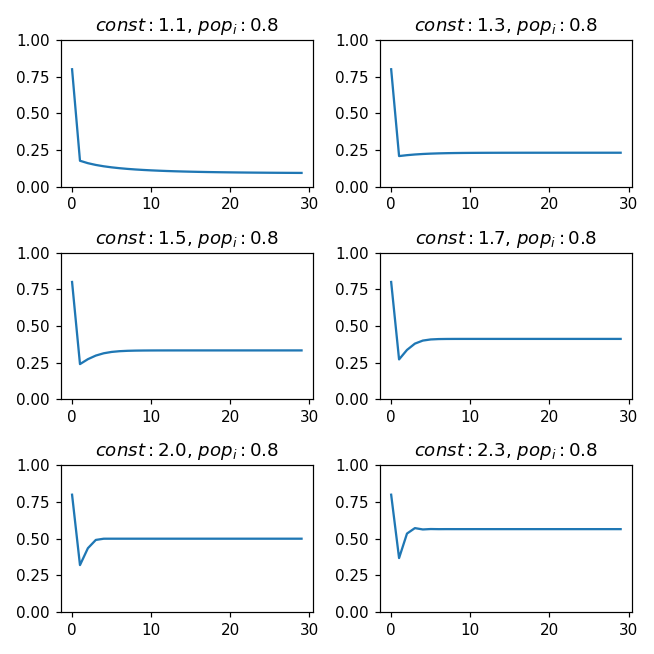

In [5]:
graph.snapshot(
    m2, 30, 
    [(1.1, 0.8), (1.3, 0.8), 
     (1.5, 0.8), (1.7, 0.8), 
     (2.0, 0.8), (2.3, 0.8)])

### Rough start interval: $2.3<b<2.9$

Population more prone to fluctuations around the stable point before settling

<IPython.core.display.Javascript object>


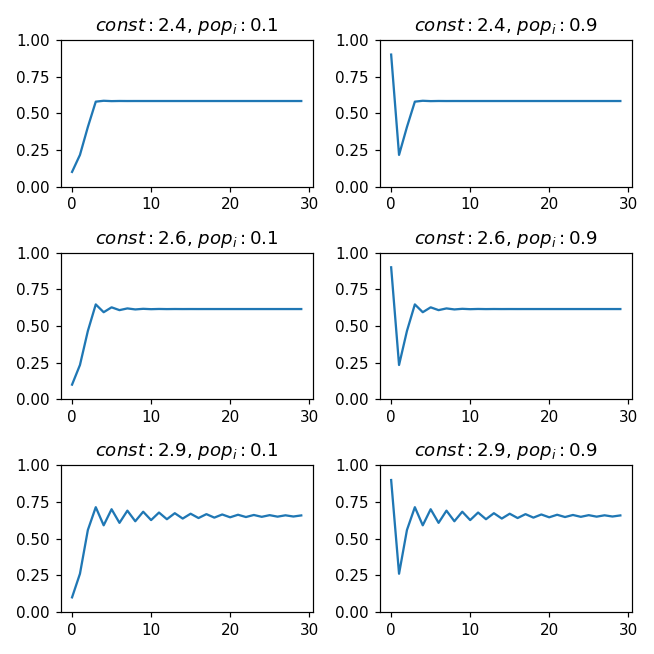

In [6]:
graph.snapshot(
    m2, 30, 
    [(2.4, 0.1), (2.4, 0.9), 
     (2.6, 0.1), (2.6, 0.9), 
     (2.9, 0.1), (2.9, 0.9)])

### Win some - Lose some interval: $2.9<b<3.5$

Population experiences continuous short periods of fluctuations with identifiable patterns.

<IPython.core.display.Javascript object>


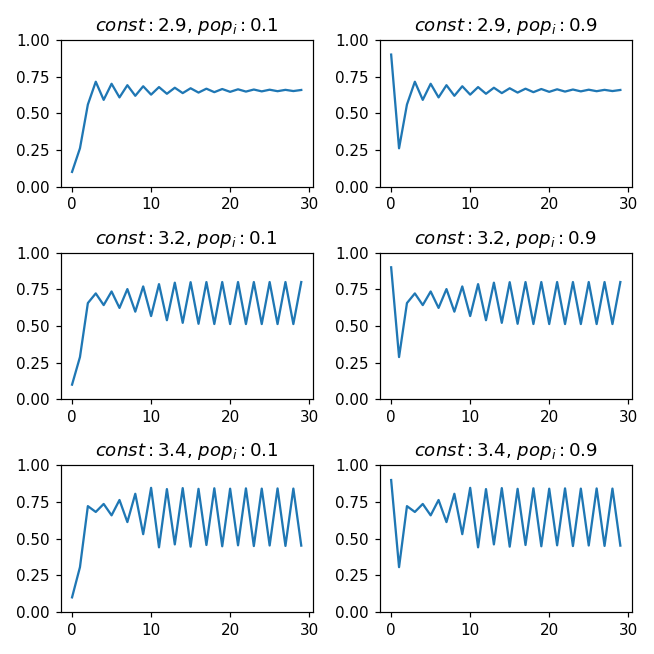

In [7]:
graph.snapshot(
    m2, 30, 
    [(2.9, 0.1), (2.9, 0.9), 
     (3.2, 0.1), (3.2, 0.9), 
     (3.4, 0.1), (3.4, 0.9)])

### Chaos interval: $3.5<b<4.0$

More sporadic fluctuations ranging from near-max population to near-extinction.

<IPython.core.display.Javascript object>


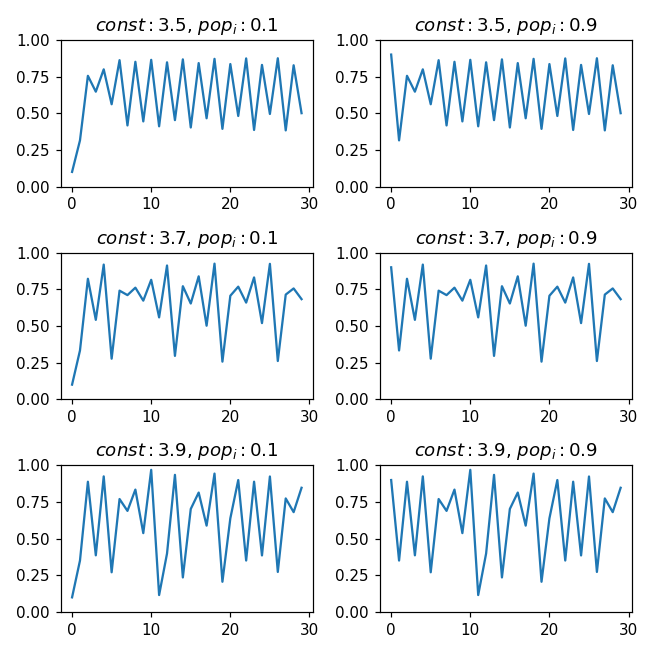

In [8]:
graph.snapshot(
    m2, 30, 
    [(3.5, 0.1), (3.5, 0.9), 
     (3.7, 0.1), (3.7, 0.9), 
     (3.9, 0.1), (3.9, 0.9)])

## Conclusion

It was interesting to see that the model can be broken up into intervals of typical behavior. If the "growth constant" is likened to the bountifulness/yield of the environment, a few scenarios can be painted. 

On the one hand if the environment is too barren, any mayfly population is unsustainable. On the other, if the environment is too permissive, the eventual rebound can also potentially be catastrophic. 

Something of note is that with too permissive of an environment, even periods of stability are brief; as can be seen with $b>3.5$. Which leads me to conclude that the function can become even more accurate by replacing the growth constant with the derivative of the function.